<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/Deep_Learning_Package_Stock_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 7.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=f10607da89c1582c5ea4c9734beb4119b5984ce603b052247b9ed6c7c7165841
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

data_df = yf.download("PFE", start="2015-02-01", end="2020-11-21")
data_df=data_df.reset_index()

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-02,29.829222,30.028463,29.430740,30.028463,24.094809,24550000
1,2015-02-03,30.208729,30.512335,29.848198,30.379507,24.376486,34785300
2,2015-02-04,30.332067,30.616699,30.094877,30.426945,24.629921,38671400
3,2015-02-05,31.347248,31.499052,30.929790,31.299810,25.336487,62653700
4,2015-02-06,31.271347,31.707781,31.053131,31.470589,25.474730,36868500


In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
len(data_df)

1464

In [ ]:
int(0.8*len(data_df))

1171

In [ ]:
data_df.iloc[0]

Date         2015-02-02 00:00:00
Open                     29.8292
High                     30.0285
Low                      29.4307
Close                    30.0285
Adj Close                24.0948
Volume                  24550000
Name: 0, dtype: object

In [ ]:
training_set = data_df.iloc[:int(0.8*len(data_df)), 1:2].values
test_set = data_df.iloc[int(0.8*len(data_df)):, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set)):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1111, 60, 1)

In [ ]:
X_train

array([[[0.16592177],
        [0.18826816],
        [0.19553068],
        ...,
        [0.37597759],
        [0.38379884],
        [0.35027931]],

       [[0.18826816],
        [0.19553068],
        [0.25530723],
        ...,
        [0.38379884],
        [0.35027931],
        [0.31843566]],

       [[0.19553068],
        [0.25530723],
        [0.25083797],
        ...,
        [0.35027931],
        [0.31843566],
        [0.31508389]],

       ...,

       [[0.81284921],
        [0.83687137],
        [0.84022337],
        ...,
        [0.45251402],
        [0.44413413],
        [0.47039104]],

       [[0.83687137],
        [0.84022337],
        [0.84972051],
        ...,
        [0.44413413],
        [0.47039104],
        [0.44189939]],

       [[0.84022337],
        [0.84972051],
        [0.88826815],
        ...,
        [0.47039104],
        [0.44189939],
        [0.43575425]]])

In [ ]:
len(test_set)

293

In [ ]:
inputs = data_df.iloc[int(0.8*len(data_df))-60:,1:2].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test=[]
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
    
X_test = np.array(X_test)
y_test=np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(293, 60, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0342
Epoch 2/100
35/35 [==============================] - 4s 114ms/step - loss: 0.0089
Epoch 3/100
35/35 [==============================] - 4s 115ms/step - loss: 0.0081
Epoch 4/100
35/35 [==============================] - 4s 113ms/step - loss: 0.0067
Epoch 5/100
35/35 [==============================] - 4s 112ms/step - loss: 0.0069
Epoch 6/100
35/35 [==============================] - 4s 111ms/step - loss: 0.0065
Epoch 7/100
35/35 [==============================] - 4s 108ms/step - loss: 0.0070
Epoch 8/100
35/35 [==============================] - 4s 111ms/step - loss: 0.0066
Epoch 9/100
35/35 [==============================] - 4s 110ms/step - loss: 0.0056
Epoch 10/100
35/35 [==============================] - 4s 113ms/step - loss: 0.0058
Epoch 11/100
35/35 [==============================] - 4s 113ms/step - loss: 0.0057
Epoch 12/100
35/35 [==============================] - 4s 112ms/step - loss: 0.0075
Epoch 13/100


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [ ]:
from sklearn.metrics import r2_score
import itertools
y_pred = list(itertools.chain.from_iterable(predicted_stock_price))
print(r2_score(y_test,predicted_stock_price))

-75964.76270972245


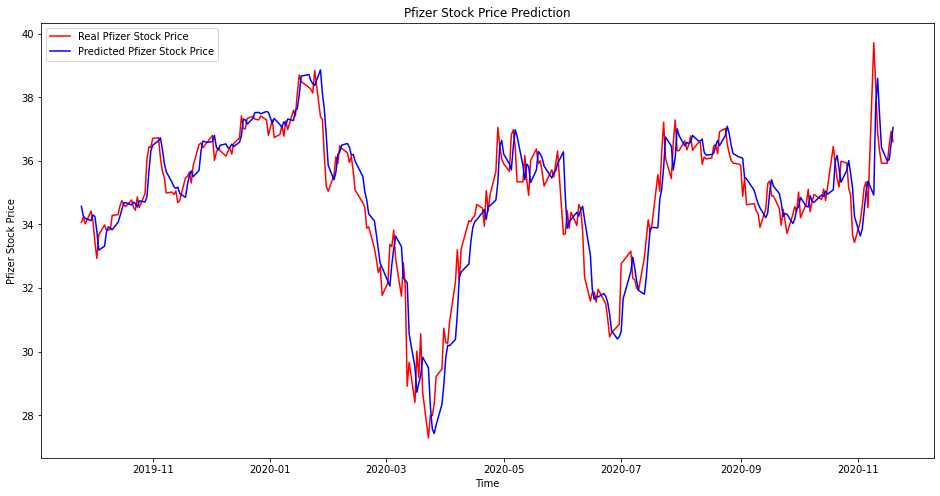

In [ ]:
# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(data_df.loc[int(0.8*len(data_df)):, 'Date'],test_set, color = 'red', label = 'Real Pfizer Stock Price')
plt.plot(data_df.loc[int(0.8*len(data_df)):, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted Pfizer Stock Price')
plt.title('Pfizer Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Pfizer Stock Price')
plt.legend()
plt.show()